
POD Coefficients (first r modes across snapshots):
      Mode 1     Mode 2     Mode 3     Mode 4     Mode 5     Mode 6
-197378.3340  4589.9071 -2465.3226  3087.9040  2239.2910  2302.9686
-197005.3664  5244.1458  -960.7884  3745.6137  1207.7602  1872.5758
-198222.8445  5259.5312   778.0181  3712.2756  -182.6175   736.5304
-197842.1744  4459.6615  2462.1139  2937.1359 -1657.8313  -472.0631
-197031.4147  3070.5255  3866.5242  1777.6016 -2804.5906 -1183.8263
-198192.7023  1224.9294  4775.4385   544.4545 -3343.7848 -1135.6019
-198195.2496  -787.7914  5031.5538  -465.6737 -3200.8605  -398.8508
-197188.9123 -2680.5891  4637.8018  -948.2632 -2494.4758   730.6881
-198180.1774 -4292.2459  3612.0011  -946.7548 -1477.2771  1820.4711
-198522.6839 -5388.4622  2176.1087  -511.1074  -421.2146  2410.0471
-197380.3691 -5923.5738   454.7824   199.2580   354.1107  2357.4623
-197990.1717 -5904.9603 -1303.5683   882.9334   701.4524  1653.5368
-198721.1398 -5381.5017 -2965.4320  1335.3650   602.8723   513.0

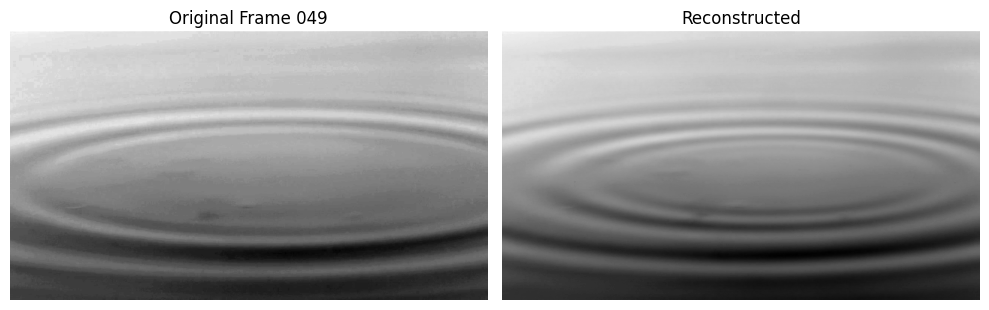

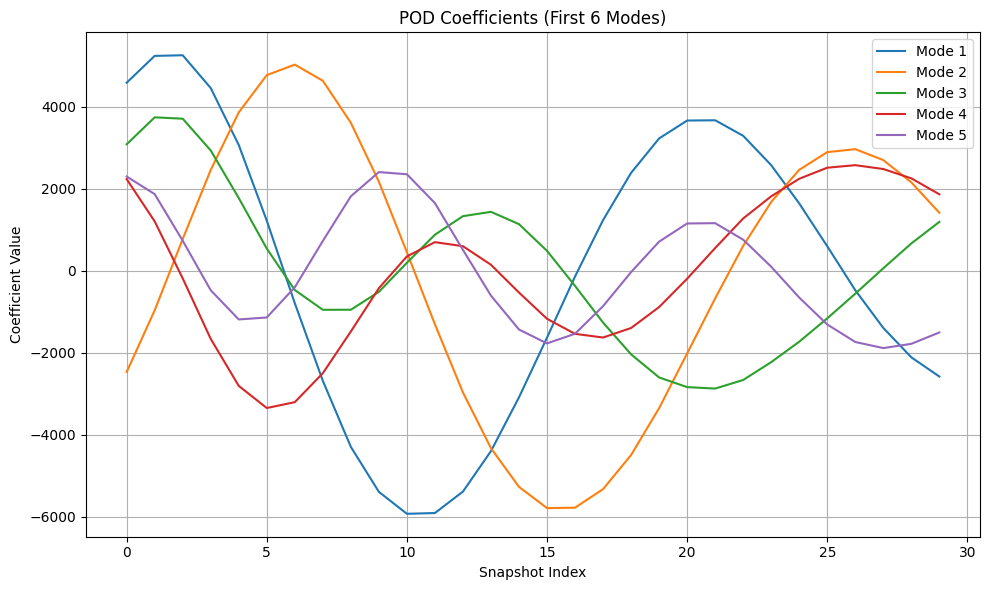

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
from scipy.optimize import curve_fit

# Step 1: Load images from frame_start.jpg to frame_end.jpg
def load_images(folder='C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Waterdrop_data', prefix='frame_', ext='.jpg', start=0, end=49):
    snapshots = []
    image_shape = None
    for i in range(start, end + 1):
        filename = os.path.join(folder, f"{prefix}{i:03d}{ext}")
        img = Image.open(filename).convert('L')
        if image_shape is None:
            image_shape = img.size[::-1]  # (height, width)
        snapshots.append(np.array(img).flatten())
    return np.array(snapshots).T, image_shape

# Step 2: Perform POD — with or without mean removal
def perform_pod(data_matrix, with_mean_removal=True):
    if with_mean_removal:
        mean_field = np.mean(data_matrix, axis=1, keepdims=True)
        fluctuations = data_matrix - mean_field
        U, S, Vt = np.linalg.svd(fluctuations, full_matrices=False)
        modes = U
        coeffs = np.diag(S) @ Vt
    else:
        mean_field = np.zeros((data_matrix.shape[0], 1))  # No subtraction
        U, S, Vt = np.linalg.svd(data_matrix, full_matrices=False)
        modes = U
        coeffs = np.diag(S) @ Vt
    return modes, coeffs, S, mean_field

# Step 3: Reconstruct using first r modes
def reconstruct(data_mean, modes, coeffs, r):
    approx = data_mean + modes[:, :r] @ coeffs[:r, :]
    return approx

# Step 4: Show POD coefficients as table
def show_coeff_table(coeffs, r):
    df = pd.DataFrame(coeffs[:r, :].T, columns=[f"Mode {i+1}" for i in range(r)])
    print("\nPOD Coefficients (first r modes across snapshots):")
    print(df.round(4).to_string(index=False))

# Step 5: Plot original vs reconstructed frame
def plot_comparison(original, reconstructed, image_shape, frame_idx, offset):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original.reshape(image_shape), cmap='gray')
    plt.title(f"Original Frame {frame_idx + offset:03d}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed.reshape(image_shape), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main
if __name__ == "__main__":
    r = 6  # Number of modes
    target_frame = 29
    frame_start = 20
    frame_end = 49

    data_matrix, image_shape = load_images(start=frame_start, end=frame_end)

    # Toggle this to True/False for comparison
    use_mean_removal = False

    modes, coeffs, S, mean_field = perform_pod(data_matrix, with_mean_removal=use_mean_removal)
    approx_matrix = reconstruct(mean_field, modes, coeffs, r)

    show_coeff_table(coeffs, r)
    plot_comparison(
        data_matrix[:, target_frame],
        approx_matrix[:, target_frame],
        image_shape,
        target_frame,
        offset=frame_start
    )

# Step 6: Plot time evolution of POD coefficients for first r modes
def plot_pod_coefficients(coeffs, r):
    plt.figure(figsize=(10, 6))
    time_steps = np.arange(coeffs.shape[1])
    for i in range(r-1):
        plt.plot(time_steps, coeffs[i+1, :], label=f"Mode {i+1}")
    plt.xlabel("Snapshot Index")
    plt.ylabel("Coefficient Value")
    plt.title(f"POD Coefficients (First {r} Modes)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call this function
plot_pod_coefficients(coeffs, r)


In [103]:
def mode1_function(x, A, b, phi, c):
    return A * np.sin(b * x + phi) + c

def cosine_function(x, A, b, phi, c):
    return A * np.cos(b * x + phi) + c

def combo_function(x, A, b, phi, c):
    return A * np.sin(phi * x) + b * np.cos(phi * x) + c


In [5]:
coeffs_data = pd.DataFrame(coeffs, columns=[f"Snapshot {i+1}" for i in range(coeffs.shape[1])])
coeffs_data


,Snapshot 1,Snapshot 2,Snapshot 3,Snapshot 4,Snapshot 5,Snapshot 6,Snapshot 7,Snapshot 8,Snapshot 9,Snapshot 10,...,Snapshot 21,Snapshot 22,Snapshot 23,Snapshot 24,Snapshot 25,Snapshot 26,Snapshot 27,Snapshot 28,Snapshot 29,Snapshot 30
0,-197378.334026,-197005.366404,-198222.844535,-197842.174378,-197031.414716,-198192.702256,-198195.249618,-197188.912290,-198180.177407,-198522.683929,...,-197754.570290,-198925.412908,-198627.702088,-197727.833579,-198773.609244,-198902.054435,-197812.102300,-198630.853194,-199156.035199,-197956.867880
1,4589.907114,5244.145751,5259.531250,4459.661507,3070.525494,1224.929377,-787.791396,-2680.589059,-4292.245850,-5388.462245,...,3667.361082,3674.069642,3294.857398,2578.783204,1645.003920,600.863090,-470.959328,-1390.748407,-2107.511038,-2576.075206
2,-2465.322587,-960.788368,778.018069,2462.113867,3866.524155,4775.438520,5031.553803,4637.801848,3612.001052,2176.108699,...,-2012.903047,-669.443055,611.097252,1682.776306,2466.087375,2896.928185,2969.345099,2702.527244,2159.861303,1417.291276
3,3087.904037,3745.613736,3712.275627,2937.135891,1777.601596,544.454499,-465.673720,-948.263219,-946.754822,-511.107437,...,-2834.149145,-2869.304032,-2660.028287,-2224.765039,-1725.618290,-1156.587922,-555.561968,65.272338,670.530817,1195.945628
4,2239.290965,1207.760170,-182.617511,-1657.831343,-2804.590626,-3343.784786,-3200.860452,-2494.475812,-1477.277072,-421.214646,...,-190.299190,558.254162,1279.521533,1819.243184,2247.794368,2517.037548,2578.938344,2485.001457,2257.612614,1867.969124
5,2302.968572,1872.575810,736.530441,-472.063106,-1183.826302,-1135.601914,-398.850766,730.688106,1820.471075,2410.047129,...,1157.090391,1164.145641,761.111147,102.301023,-650.330896,-1307.038461,-1733.226852,-1882.025377,-1778.245952,-1500.678768
6,-2133.011216,-691.768674,681.116842,1384.548033,1225.057498,360.104646,-630.472066,-1207.489428,-1137.593792,-507.690149,...,14.948405,776.344745,1332.789530,1503.757660,1250.256083,611.472666,-198.995846,-1019.315372,-1686.259970,-2047.172825
7,1513.252553,439.391389,-695.003863,-1081.735137,-548.003180,386.174953,987.104550,904.385041,308.294276,-373.861860,...,-661.268356,-282.655402,181.323607,549.992652,727.571791,574.171546,187.863682,-304.675016,-819.427339,-1203.575013
8,-876.029163,328.515686,980.845546,490.105375,-467.741764,-927.797497,-586.762229,268.366954,813.105917,691.960459,...,-509.156220,-489.047008,-236.153725,106.432069,426.230721,510.208999,382.098489,101.030923,-299.972743,-737.258829
9,593.098738,-306.819911,-574.833325,46.882408,650.433111,424.454719,-289.566796,-678.543858,-295.186510,356.390415,...,-216.689640,-364.731256,-340.565467,-99.657820,209.044375,383.954768,348.776744,109.447157,-238.836558,-559.054479


In [23]:
from sklearn.model_selection import train_test_split

# X = coeffs_data.iloc[1:r+1, :].T.values  # Exclude the first row (mean)
# y = coeffs_data.iloc[0, :].values  # First row (mean) as target variable

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[0, :].values  # First row (mean) as target variable
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [0.4, 0.2, 0, 0.5]

In [26]:
popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)
popt

array([-1.34549558e+02,  4.81791048e+00,  2.38496274e+01, -1.98118957e+05])

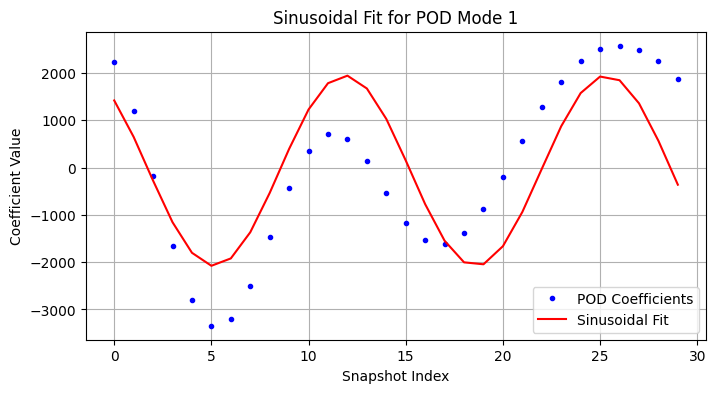

In [107]:
plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 1")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

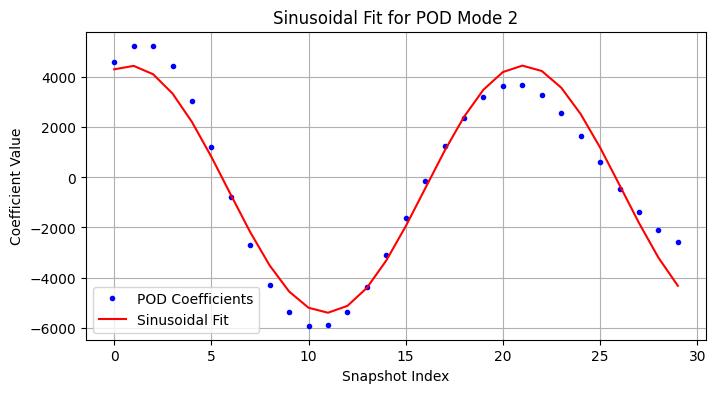

[-4.93541074e+03 -3.10222272e-01  5.01329346e+02 -4.70448665e+02]


In [47]:
# POD Mode 2

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[1, :].values  
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [0.25, 0.2, 0.2, 1]

popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)

plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 2")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

print(popt)

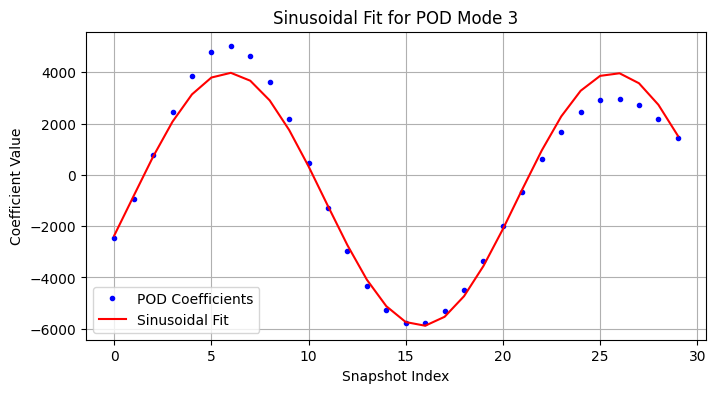

[4935.07280216  238.44420802 3886.44013278 -955.7509697 ]


In [58]:
# POD Mode 3

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[2, :].values  
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [0.025, 0.2, 0.2, 1]

popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)

plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 3")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

print(popt)

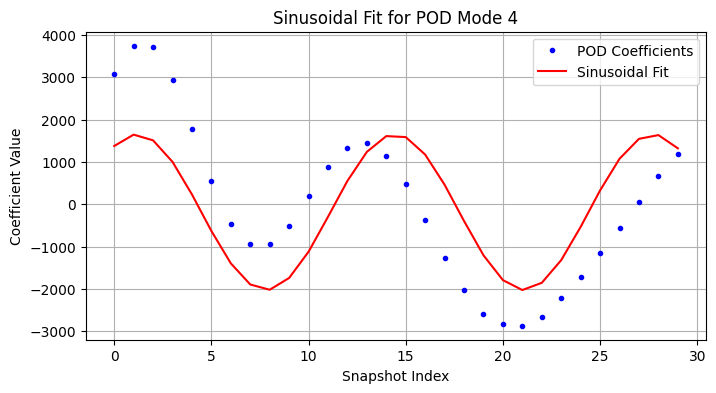

[ 1.83902612e+03  4.73315734e-01  1.01791398e+00 -1.88273691e+02]


In [99]:
# POD Mode 4

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[3, :].values  
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [3400, 0.45, 1.12, 0.3]

popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)

plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 4")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

print(popt)

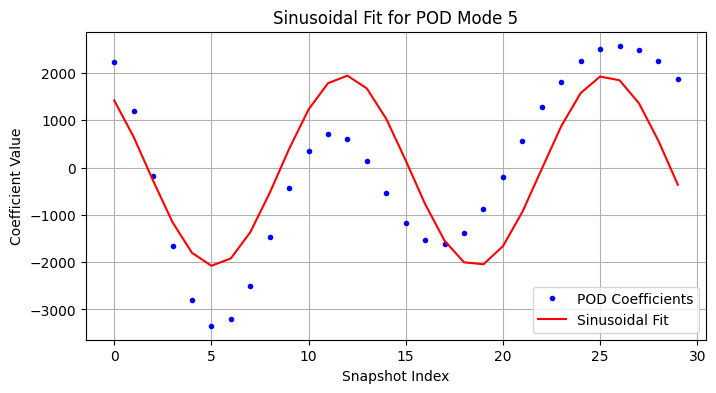

[ 2.01480477e+03  4.67018849e-01  2.31156714e+00 -6.54214945e+01]


In [105]:
# POD Mode 5

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[4, :].values  
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [2750, 0.63, 0.31, -250]

popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)

plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 5")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

print(popt)

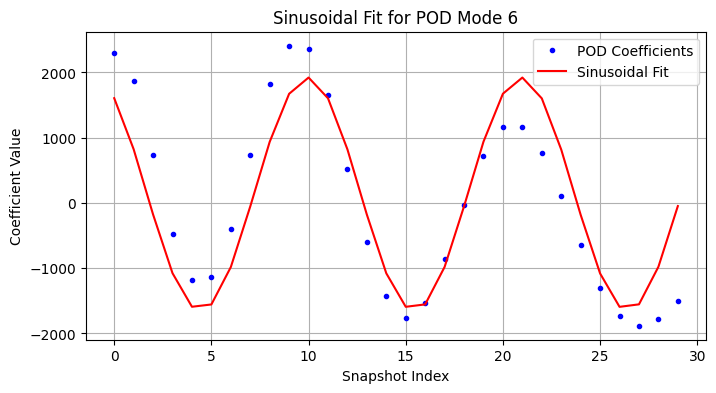

[-1.78520585e+03  5.71336790e-01 -9.65283020e-01  1.38126109e+02]


In [108]:
# POD Mode 6

time = np.arange(coeffs.shape[1])
y_data = coeffs_data.iloc[5, :].values  
t_data = time
valid_mask = ~np.isnan(y_data)
y_valid = y_data[valid_mask]
t_valid = t_data[valid_mask]
p0 = [3400, 0.45, 1.12, 0.3]

popt, pcov = curve_fit(mode1_function, t_valid, y_valid, p0=p0)

plt.figure(figsize=(8,4))
plt.plot(t_valid, y_valid, "b.", label="POD Coefficients")
plt.plot(t_valid, mode1_function(t_valid, *popt), "r-", label="Sinusoidal Fit")
plt.title(f"Sinusoidal Fit for POD Mode 6")
plt.xlabel("Snapshot Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()

print(popt)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930.4714911092888, tolerance: 852.1238854705075
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663.665804782242, tolerance: 852.1238854705075
  model = cd_fast.enet_coordinate_descent_gram(


,Mode,Term,Coefficient
0,Mode 1,sin(1f),188.743348
1,Mode 1,sin(2f),12.799692
2,Mode 1,cos(8f),36.946209
3,Mode 1,cos(9f),389.934477
4,Mode 1,cos(10f),-228.112568
...,...,...,...
65,Mode 5,cos(7f),40.822881
66,Mode 5,cos(8f),26.774531
67,Mode 5,cos(9f),32.250088
68,Mode 5,cos(10f),28.805478


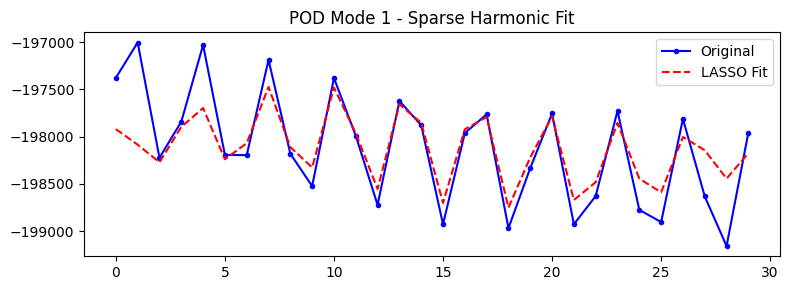

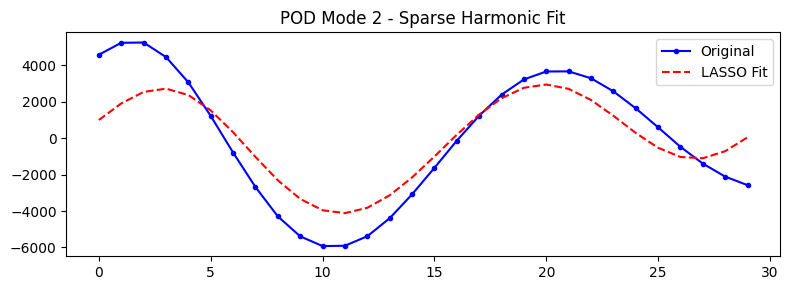

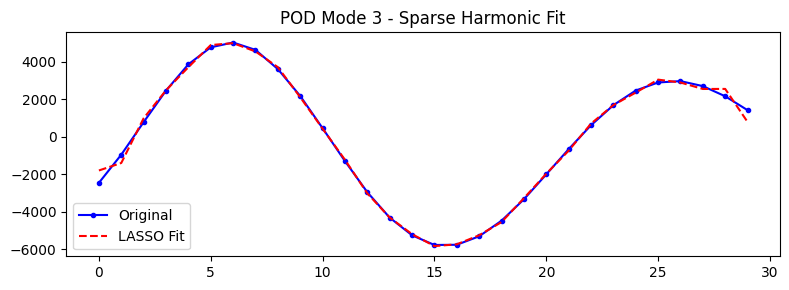

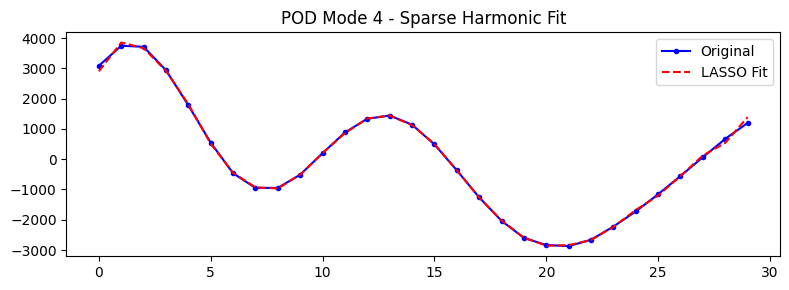

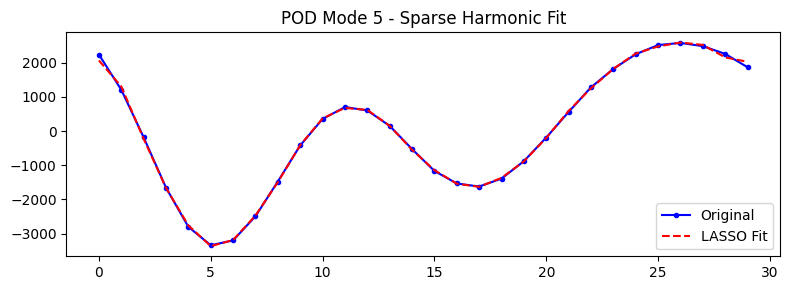

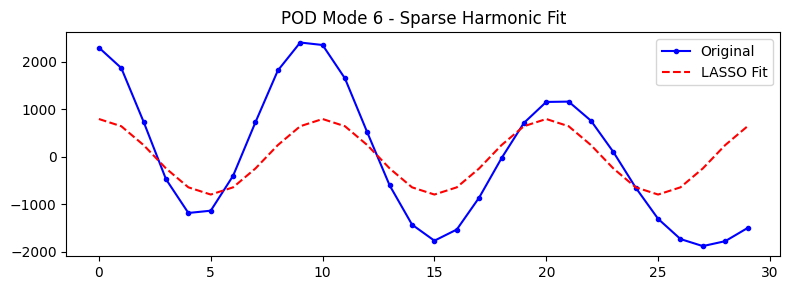

In [114]:
from sklearn.linear_model import LassoCV

time = np.arange(coeffs.shape[1])
max_freq = 10  # maximum harmonic frequency to test

# Create harmonic feature matrix for LASSO: sin(kx), cos(kx)
X = np.column_stack([
    np.sin(2 * np.pi * k * time / len(time)) for k in range(1, max_freq + 1)
] + [
    np.cos(2 * np.pi * k * time / len(time)) for k in range(1, max_freq + 1)
])
feature_names = [f"sin({k}f)" for k in range(1, max_freq + 1)] + [f"cos({k}f)" for k in range(1, max_freq + 1)]

# Apply LASSO to the first 3 POD mode time series
lasso_results = {}
for mode_idx in range(6):
    y = coeffs[mode_idx, :]
    lasso = LassoCV(cv=5).fit(X, y)
    y_pred = lasso.predict(X)
    selected_features = [(name, coef) for name, coef in zip(feature_names, lasso.coef_) if abs(coef) > 1e-2]
    
    lasso_results[f"Mode {mode_idx+1}"] = {
        "model": lasso,
        "prediction": y_pred,
        "selected_features": selected_features
    }

    # Plot
    plt.figure(figsize=(8, 3))
    plt.plot(time, y, 'b.-', label='Original')
    plt.plot(time, y_pred, 'r--', label='LASSO Fit')
    plt.title(f"POD Mode {mode_idx+1} - Sparse Harmonic Fit")
    plt.legend()
    plt.tight_layout()

# import pandas as pd

# Display selected harmonic features for each mode

results_summary = []
for mode, result in lasso_results.items():
    for term, coef in result["selected_features"]:
        results_summary.append({"Mode": mode, "Term": term, "Coefficient": coef})

#print(results_summary)
df_results = pd.DataFrame(results_summary)
df_results

$$\text{For time steps 10 and 11, compare with original images vs. POD reconstruction of original images vs. LASSO reconstructions for analysis}$$

$$\text{Mode}_1(t) \approx 
-0.0483\sin(2\pi t) + 0.1467\sin(3\pi t) + 0.0222\sin(4\pi t) + 0.0122\sin(5\pi t)
+ 0.0314\cos(\pi t) + 0.0930\cos(2\pi t) - 0.0104\cos(4\pi t)$$


$$
\text{Mode}_2(t) \approx 
0.0196\,\sin(\pi t) + 0.0877\,\sin(2\pi t) - 0.0356\,\sin(3\pi t) - 0.0265\,\sin(4\pi t) - 0.0114\,\sin(5\pi t) \\
+ 0.0341\,\cos(\pi t) + 0.0840\,\cos(2\pi t) - 0.1435\,\cos(3\pi t) - 0.0164\,\cos(4\pi t) - 0.0102\,\cos(5\pi t)
$$


$$
\text{Mode}_3(t) \approx 
0.0543\,\sin(\pi t) + 0.1506\,\sin(2\pi t) + 0.0414\,\sin(3\pi t) + 0.0308\,\sin(4\pi t) + 0.0148\,\sin(5\pi t) + 0.0119\,\sin(6\pi t) \\
+ 0.0519\,\cos(\pi t) + 0.0886\,\cos(3\pi t)
$$


$$
\text{Mode}_4(t) \approx 
-0.0231\,\sin(\pi t) - 0.0162\,\sin(2\pi t) - 0.0988\,\sin(3\pi t) + 0.0344\,\sin(4\pi t) + 0.0154\,\sin(5\pi t) \\
+ 0.1430\,\cos(2\pi t) + 0.0822\,\cos(3\pi t) + 0.0215\,\cos(4\pi t)
$$


$$
\text{Mode}_5(t) \approx 
0.1140\,\sin(\pi t) - 0.0613\,\sin(2\pi t) - 0.0396\,\sin(3\pi t) + 0.0266\,\sin(4\pi t) + 0.0656\,\sin(5\pi t) \\
+ 0.0264\,\sin(6\pi t) + 0.0175\,\sin(7\pi t) + 0.0147\,\sin(8\pi t) + 0.0126\,\sin(9\pi t) + 0.0104\,\sin(10\pi t) \\
+ 0.0845\,\cos(\pi t) - 0.0220\,\cos(2\pi t) - 0.0302\,\cos(3\pi t) + 0.0679\,\cos(4\pi t) + 0.0111\,\cos(5\pi t)
$$


$$
\text{Mode}_6(t) \approx 
0.0432\,\sin(\pi t) - 0.0179\,\sin(2\pi t) + 0.0846\,\sin(4\pi t) - 0.0920\,\sin(5\pi t) - 0.0328\,\sin(6\pi t) \\
+ 0.0130\,\cos(\pi t) - 0.0373\,\cos(4\pi t) - 0.0858\,\cos(5\pi t)
$$


In [2]:
def mode1(t):
    return (-0.0483*np.sin(2*np.pi*t) + 0.1467*np.sin(3*np.pi*t) + 0.0222*np.sin(4*np.pi*t) +
            0.0122*np.sin(5*np.pi*t) + 0.0314*np.cos(1*np.pi*t) + 0.0930*np.cos(2*np.pi*t) +
            -0.0104*np.cos(4*np.pi*t))

def mode2(t):
    return (0.0196*np.sin(1*np.pi*t) + 0.0877*np.sin(2*np.pi*t) - 0.0356*np.sin(3*np.pi*t) -
            0.0265*np.sin(4*np.pi*t) - 0.0114*np.sin(5*np.pi*t) + 0.0341*np.cos(1*np.pi*t) +
            0.0840*np.cos(2*np.pi*t) - 0.1435*np.cos(3*np.pi*t) - 0.0164*np.cos(4*np.pi*t) -
            0.0102*np.cos(5*np.pi*t))

def mode3(t):
    return (0.0543*np.sin(1*np.pi*t) + 0.1506*np.sin(2*np.pi*t) + 0.0414*np.sin(3*np.pi*t) +
            0.0308*np.sin(4*np.pi*t) + 0.0148*np.sin(5*np.pi*t) + 0.0119*np.sin(6*np.pi*t) +
            0.0519*np.cos(1*np.pi*t) + 0.0886*np.cos(3*np.pi*t))

def mode4(t):
    return (-0.0231*np.sin(1*np.pi*t) - 0.0162*np.sin(2*np.pi*t) - 0.0988*np.sin(3*np.pi*t) +
            0.0344*np.sin(4*np.pi*t) + 0.0154*np.sin(5*np.pi*t) + 0.1430*np.cos(2*np.pi*t) +
            0.0822*np.cos(3*np.pi*t) + 0.0215*np.cos(4*np.pi*t))

def mode5(t):
    return (0.1140*np.sin(1*np.pi*t) - 0.0613*np.sin(2*np.pi*t) - 0.0396*np.sin(3*np.pi*t) +
            0.0266*np.sin(4*np.pi*t) + 0.0656*np.sin(5*np.pi*t) + 0.0264*np.sin(6*np.pi*t) +
            0.0175*np.sin(7*np.pi*t) + 0.0147*np.sin(8*np.pi*t) + 0.0126*np.sin(9*np.pi*t) +
            0.0104*np.sin(10*np.pi*t) + 0.0845*np.cos(1*np.pi*t) - 0.0220*np.cos(2*np.pi*t) -
            0.0302*np.cos(3*np.pi*t) + 0.0679*np.cos(4*np.pi*t) + 0.0111*np.cos(5*np.pi*t))

def mode6(t):
    return (0.0432*np.sin(1*np.pi*t) - 0.0179*np.sin(2*np.pi*t) + 0.0846*np.sin(4*np.pi*t) -
            0.0920*np.sin(5*np.pi*t) - 0.0328*np.sin(6*np.pi*t) + 0.0130*np.cos(1*np.pi*t) -
            0.0373*np.cos(4*np.pi*t) - 0.0858*np.cos(5*np.pi*t))

# # Combine modes for reconstruction
# def combined_model(t):
#     coeffs = np.array([
#         mode1(t), mode2(t), mode3(t),
#         mode4(t), mode5(t), mode6(t)
#     ])
#     reconstruction = mean_snapshot.flatten()
#     for i in range(6):
#         reconstruction += S[i] * coeffs[i] * U[:, i]
#     return reconstruction.reshape((80, 128))

# # Choose a few timesteps: 3 original (t in [0, 1]), 3 extrapolated (t > 1)
# t_compare = np.concatenate([
#     np.linspace(0, 1, 3, endpoint=False),  # t = 0.0, 0.33, 0.67 (original)
#     np.linspace(1, 2, 3)                  # t = 1.0, 1.5, 2.0 (extrapolated)
# ])

# # Reconstruct frames from combined model
# combined_images = [combined_model(t) for t in t_compare]

# # Load corresponding original images (first 3 real snapshots)
# original_images = [data_matrix[:, i].reshape((80, 128)) for i in [0, 16, 33]]

# # Plot side-by-side comparisons
# fig, axes = plt.subplots(2, 3, figsize=(15, 6))
# for i in range(3):
#     axes[0, i].imshow(original_images[i], cmap='gray')
#     axes[0, i].set_title(f'Original #{i * 16 + 1}')
#     axes[1, i].imshow(combined_images[i + 3], cmap='gray')
#     axes[1, i].set_title(f'Extrapolated t={t_compare[i+3]:.2f}')
#     for ax in [axes[0, i], axes[1, i]]:
#         ax.axis('off')

# plt.suptitle("Original vs Extrapolated Image Snapshots (All 6 POD Modes)")
# plt.tight_layout()
# plt.show()

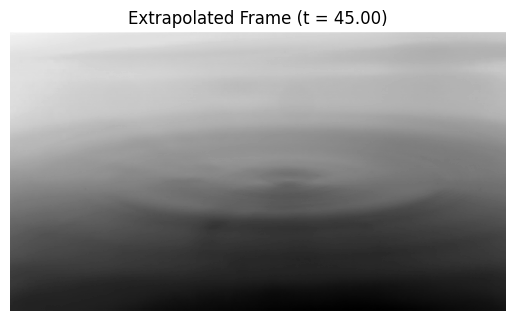

In [3]:
mode_functions = [mode1, mode2, mode3, mode4, mode5, mode6]

# Load image data
def load_image_data(folder, prefix="frame_", ext=".jpg", start=0, end=49):
    image_paths = [os.path.join(folder, f"{prefix}{i:03d}{ext}") for i in range(start, end + 1)]
    image_shape = Image.open(image_paths[0]).convert('L').size[::-1]
    images = [np.array(Image.open(p).convert('L')).flatten() for p in image_paths]
    return np.array(images).T, image_shape

# POD 
def perform_pod(data_matrix, with_mean_removal=True):
    if with_mean_removal:
        mean_field = np.mean(data_matrix, axis=1, keepdims=True)
        fluctuations = data_matrix - mean_field
        U, S, Vt = np.linalg.svd(fluctuations, full_matrices=False)
        modes = U
        coeffs = np.diag(S) @ Vt
    else:
        mean_field = np.zeros((data_matrix.shape[0], 1))
        U, S, Vt = np.linalg.svd(data_matrix, full_matrices=False)
        modes = U
        coeffs = np.diag(S) @ Vt
    return modes, coeffs, S, mean_field

# Main Execution 
folder = "C:/Users/coryg/OneDrive/Desktop/STAT_698_Thesis_Joon_Suzuki/Waterdrop_data"  # Adjust this to your local path
data_matrix, image_shape = load_image_data(folder, start=0, end=49)
modes, coeffs, S, mean_field = perform_pod(data_matrix)

# Extrapolate 
r = 6
future_times = np.linspace(45, 49, 5)
future_coeffs = np.array([[mode_functions[i](t) for t in future_times] for i in range(r)])
extrapolated_images = mean_field + modes[:, :r] @ future_coeffs[:r, :]

# Show extrapolated frame
plt.imshow(extrapolated_images[:, 0].reshape(image_shape), cmap='gray')
plt.title(f"Extrapolated Frame (t = {future_times[0]:.2f})")
plt.axis('off')
plt.show()

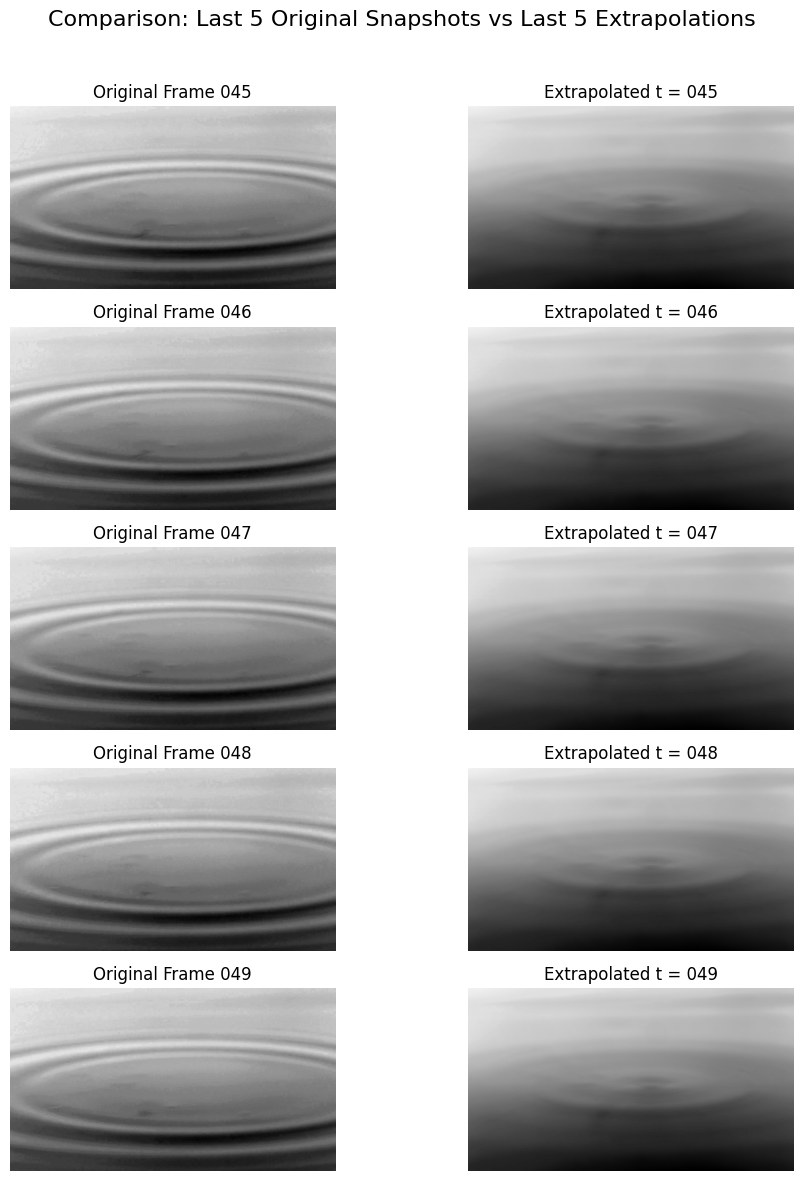

In [4]:
def compare_last_snapshots_with_last_extrapolations(data_matrix, extrapolated_images, image_shape, future_times, start_index=45):
    fig, axes = plt.subplots(5, 2, figsize=(10, 12))
    fig.suptitle("Comparison: Last 5 Original Snapshots vs Last 5 Extrapolations", fontsize=16)

    for i in range(5):
        # Original snapshot
        original_img = data_matrix[:, start_index + i].reshape(image_shape)
        axes[i, 0].imshow(original_img, cmap='gray')
        axes[i, 0].set_title(f"Original Frame {start_index + i:03d}")
        axes[i, 0].axis('off')

        # Last 5 extrapolations
        extrap_img = extrapolated_images[:, i].reshape(image_shape)
        axes[i, 1].imshow(extrap_img, cmap='gray')
        axes[i, 1].set_title(f"Extrapolated t = {start_index + i:03d}")
        axes[i, 1].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# # This line can be adjusted to extract future extrapolations
# extended_future_times = np.linspace(45, 49, 10)

# # Evaluate coefficients for extended future times
# extended_future_coeffs = np.array([[mode_functions[i](t) for t in extended_future_times] for i in range(6)])

# # Compute new extrapolated images
# extended_extrapolated_images = modes[:, :6] @ extended_future_coeffs

# Display comparison: last 5 original vs last 5 extended extrapolations
compare_last_snapshots_with_last_extrapolations(
    data_matrix,
    extrapolated_images,
    image_shape,
    future_times
)


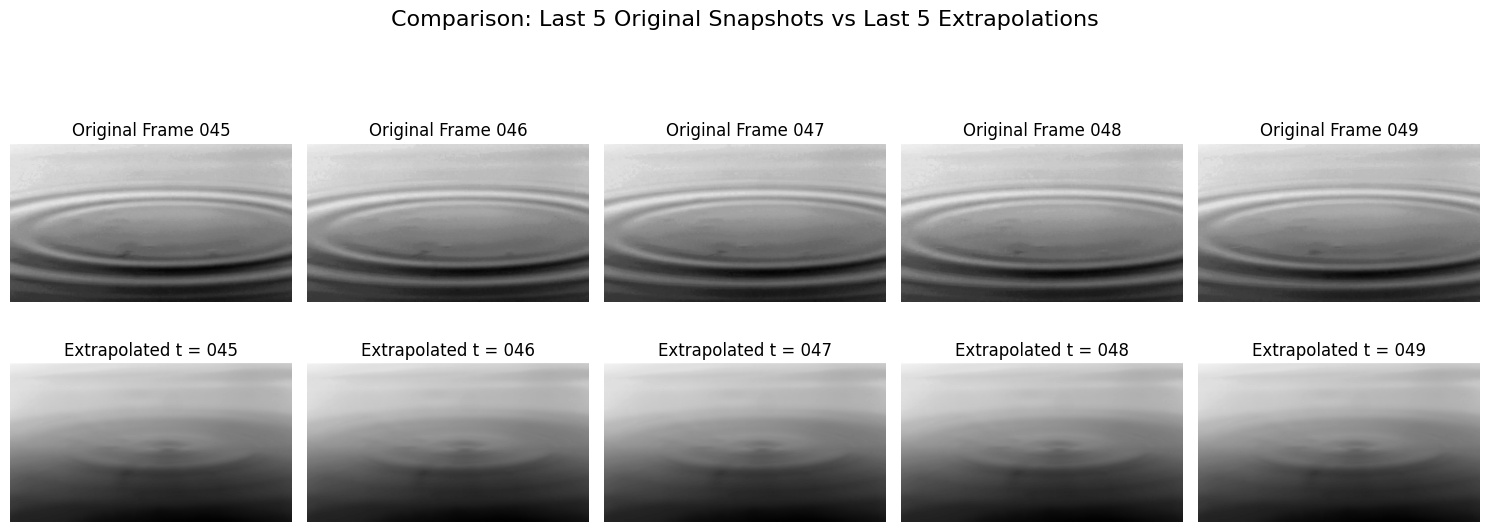

In [12]:
def compare_last_snapshots_with_last_extrapolations(data_matrix, extrapolated_images, image_shape, future_times, start_index=45):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Transposed: 2 rows, 5 columns
    fig.suptitle("Comparison: Last 5 Original Snapshots vs Last 5 Extrapolations", fontsize=16)

    for i in range(5):
        # Original snapshot (top row)
        original_img = data_matrix[:, start_index + i].reshape(image_shape)
        axes[0, i].imshow(original_img, cmap='gray')
        axes[0, i].set_title(f"Original Frame {start_index + i:03d}")
        axes[0, i].axis('off')

        # Extrapolated image (bottom row)
        extrap_img = extrapolated_images[:, i].reshape(image_shape)
        axes[1, i].imshow(extrap_img, cmap='gray')
        axes[1, i].set_title(f"Extrapolated t = {start_index + i:03d}")
        axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

compare_last_snapshots_with_last_extrapolations(
    data_matrix,
    extrapolated_images,
    image_shape,
    future_times
)

In [6]:
residual1 = np.abs(data_matrix[:, 45] - extrapolated_images[:, 0])
residual2 = np.abs(data_matrix[:, 46] - extrapolated_images[:, 1])
residual3 = np.abs(data_matrix[:, 47] - extrapolated_images[:, 2])
residual4 = np.abs(data_matrix[:, 48] - extrapolated_images[:, 3])
residual5 = np.abs(data_matrix[:, 49] - extrapolated_images[:, 4])

mse1 = np.mean(residual1**2)
mse2 = np.mean(residual2**2)
mse3 = np.mean(residual3**2)
mse4 = np.mean(residual4**2)
mse5 = np.mean(residual5**2)

mse1, mse2, mse3, mse4, mse5

(29.549077101849935,
 27.21720053575677,
 28.063670156580372,
 29.878425032368657,
 27.26092252932194)

In [10]:
from skimage.metrics import structural_similarity as ssim

ssim_score1, diff1 = ssim(data_matrix[:, 45].reshape(image_shape), extrapolated_images[:, 0].reshape(image_shape), full=True, data_range=255)

ssim_score2, diff2 = ssim(data_matrix[:, 46].reshape(image_shape), extrapolated_images[:, 1].reshape(image_shape), full=True, data_range=255)

ssim_score3, diff3 = ssim(data_matrix[:, 47].reshape(image_shape), extrapolated_images[:, 2].reshape(image_shape), full=True, data_range=255)

ssim_score4, diff4 = ssim(data_matrix[:, 48].reshape(image_shape), extrapolated_images[:, 3].reshape(image_shape), full=True, data_range=255)

ssim_score5, diff5 = ssim(data_matrix[:, 49].reshape(image_shape), extrapolated_images[:, 4].reshape(image_shape), full=True, data_range=255)

ssim_score1, ssim_score2, ssim_score3, ssim_score4, ssim_score5

(0.9811586646358147,
 0.981271287616758,
 0.9821726397150954,
 0.9814658510228697,
 0.9823706930417079)